A momentum trading strategy

In [1]:
import pandas as pd
import numpy as np
import random

# Generate some random data for demonstration purposes
np.random.seed(42)
random.seed(42)

# Create a date range
dates = pd.date_range(start='2023-01-01', end='2023-10-01', freq='B')

# Create a dataframe with random stock data
df = pd.DataFrame(index=dates)

# Generate random stock prices for three hypothetical stocks
df['Stock_A'] = np.random.randint(80, 120, size=len(dates)).astype(float)
df['Stock_B'] = np.random.randint(50, 100, size=len(dates)).astype(float)
df['Stock_C'] = np.random.randint(100, 150, size=len(dates)).astype(float)

# Add some random noise to simulate price fluctuations
df += np.random.normal(0, 2, size=(len(dates), 3))

# Calculate daily returns
df['Returns_A'] = df['Stock_A'].pct_change()
df['Returns_B'] = df['Stock_B'].pct_change()
df['Returns_C'] = df['Stock_C'].pct_change()

# Calculate 5-day and 20-day rolling averages
df['Rolling_Avg_5'] = df['Returns_A'].rolling(window=5).mean()
df['Rolling_Avg_20'] = df['Returns_A'].rolling(window=20).mean()

df['Rolling_Avg_5_B'] = df['Returns_B'].rolling(window=5).mean()
df['Rolling_Avg_20_B'] = df['Returns_B'].rolling(window=20).mean()

df['Rolling_Avg_5_C'] = df['Returns_C'].rolling(window=5).mean()
df['Rolling_Avg_20_C'] = df['Returns_C'].rolling(window=20).mean()

# Create some random categorical signals for demonstration
df['Signal_A'] = np.where(df['Rolling_Avg_5'] > df['Rolling_Avg_20'], 1, 0)
df['Signal_B'] = np.where(df['Rolling_Avg_5_B'] > df['Rolling_Avg_20_B'], 1, 0)
df['Signal_C'] = np.where(df['Rolling_Avg_5_C'] > df['Rolling_Avg_20_C'], 1, 0)

# Display the dataframe
print(df.head())


               Stock_A    Stock_B     Stock_C  Returns_A  Returns_B  \
2023-01-02  117.975506  69.205491  114.151609        NaN        NaN   
2023-01-03  106.645677  61.950239  141.705885  -0.096035  -0.104836   
2023-01-04   92.349006  96.357228  136.825863  -0.134058   0.555397   
2023-01-05   85.872551  63.355559  132.487374  -0.070130  -0.342493   
2023-01-06  100.489933  80.986114  106.057923   0.170222   0.278280   

            Returns_C  Rolling_Avg_5  Rolling_Avg_20  Rolling_Avg_5_B  \
2023-01-02        NaN            NaN             NaN              NaN   
2023-01-03   0.241383            NaN             NaN              NaN   
2023-01-04  -0.034438            NaN             NaN              NaN   
2023-01-05  -0.031708            NaN             NaN              NaN   
2023-01-06  -0.199487            NaN             NaN              NaN   

            Rolling_Avg_20_B  Rolling_Avg_5_C  Rolling_Avg_20_C  Signal_A  \
2023-01-02               NaN              NaN            

Case study 2: Machine learning for mean reversion

In [5]:
# Uncomment these lines if running in a Jupyter notebook or IPython environment
!pip install ta
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=dec69bcbb520e3777b82091275dbf338e056e6e47385476ffe17a84e0f8ba185
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

# Load dataset (example: Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Feature scaling
    ('clf', RandomForestClassifier())             # Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate model with cross-validation
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")


Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 100}
Cross-validation accuracy scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668
Standard deviation of accuracy: 0.02108185106778919


Case study 3: Sentiment analysis for trading signals

In [ ]:
import tweepy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Twitter API credentials
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Define the stock symbol
stock_symbol = 'AAPL'

# Fetch recent tweets related to the stock
tweets = api.search(q=stock_symbol, count=10)

# Display the retrieved tweets
for tweet in tweets:
    print(tweet.text)

# Pre-processing the tweet text
nltk.download('stopwords')
nltk.download('punkt')

# Sample tweet
tweet = "Stock prices soaring! #BullMarket"

# Tokenize the tweet
tokens = word_tokenize(tweet)

# Remove stop words
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

print("Filtered Tokens:", filtered_tokens)

# Sample data for sentiment analysis
X = ["Stocks are rising!", "Market is uncertain.", "Economic downturn ahead."]
y = ["Positive", "Neutral", "Negative"]

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Sample sentiment scores and stock prices for trading signals
sentiment_scores = [0.8, -0.5, 0.2, 0.9, -0.3]
stock_prices = [100, 105, 98, 110, 95]

# Create a DataFrame
df = pd.DataFrame({'Sentiment': sentiment_scores, 'StockPrice': stock_prices})

# Create a moving average column
df['MA_Sentiment'] = df['Sentiment'].rolling(window=3).mean()

# Generate trading signals based on the moving average
df['Signal'] = df['MA_Sentiment'].apply(lambda x: 'Buy' if x > 0 else 'Sell')

print("Trading Signals:")
print(df)


Case study 4: Portfolio optimization with artificial intelligence

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import gym
import tensorflow as tf
from tensorflow.keras import layers

# Define expected returns and covariance matrix (replace with real data)
returns = np.array([0.12, 0.18, 0.25])
covariance_matrix = np.array([[0.1, 0.03, 0.05], [0.03, 0.12, 0.07], [0.05, 0.07, 0.15]])

# Classical Portfolio Optimization: Minimize Negative Sharpe Ratio
def objective(weights, returns, covariance_matrix):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Initial weights
initial_weights = [1/3, 1/3, 1/3]

# Minimize negative Sharpe ratio to find optimal weights
result = minimize(objective, initial_weights, args=(returns, covariance_matrix), method='SLSQP', constraints=constraints)
optimal_weights = result.x
print("Optimal Weights (Classical):", optimal_weights)

# Reinforcement Learning for Portfolio Allocation
class PortfolioEnv(gym.Env):
    def __init__(self, returns):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.portfolio_value = 1.0
        self.current_weights = np.ones(len(returns)) / len(returns)

    def step(self, weights):
        # Simulate portfolio returns and update portfolio value
        portfolio_returns = np.dot(self.returns, weights)
        self.portfolio_value *= (1 + portfolio_returns)

        # Calculate reward (could be modified based on specific objectives)
        reward = portfolio_returns

        return self.portfolio_value, reward, False, {}

    def reset(self):
        # Reset portfolio value and weights for a new episode
        self.portfolio_value = 1.0
        self.current_weights = np.ones(len(self.returns)) / len(self.returns)
        return self.current_weights

# Define a simple neural network model for portfolio allocation
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(returns),)),
    layers.Dense(len(returns), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using a custom gym environment
env = PortfolioEnv(returns)
observations = env.reset()
target_weights = np.array([0.4, 0.4, 0.2])  # Replace with target weights
model.fit(np.array([observations]), np.array([target_weights]), epochs=10)

print("Model Training Complete")


Optimal Weights (Classical): [0.16668164 0.30442717 0.52889119]
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0072
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0039
Model Training Complete


Case study 5: AI-driven market-making strategies

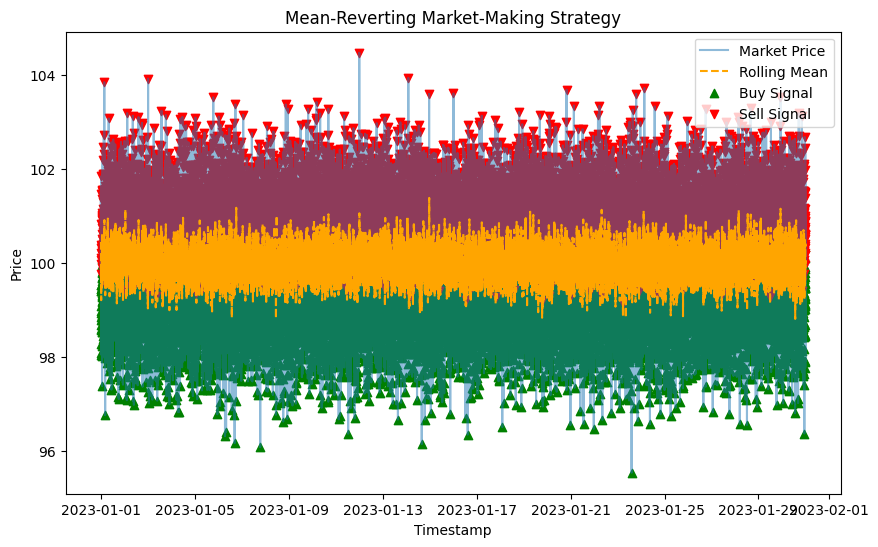

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Generate sample market data
np.random.seed(42)
timestamps = pd.date_range('2023-01-01', '2023-01-31', freq='T')
prices = np.random.normal(loc=100, scale=1, size=len(timestamps))
market_data = pd.DataFrame({'Timestamp': timestamps, 'Price': prices})

# Define a simple mean-reverting market-making strategy
def mean_reverting_strategy(data, window_size=10, spread=0.1):
    data['RollingMean'] = data['Price'].rolling(window=window_size).mean()
    data['UpperBound'] = data['RollingMean'] + spread
    data['LowerBound'] = data['RollingMean'] - spread

    # Buy when the price is below the lower bound
    data['Signal'] = np.where(data['Price'] < data['LowerBound'], 1, 0)

    # Sell when the price is above the upper bound
    data['Signal'] = np.where(data['Price'] > data['UpperBound'], -1, data['Signal'])

    return data

# Apply the mean-reverting strategy to the market data
market_data = mean_reverting_strategy(market_data)

# Simulate trading based on the signals
market_data['Position'] = market_data['Signal'].cumsum()

# Visualize the strategy's performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(market_data['Timestamp'], market_data['Price'], label='Market Price', alpha=0.5)
plt.plot(market_data['Timestamp'], market_data['RollingMean'], label='Rolling Mean', linestyle='--', color='orange')
plt.scatter(market_data['Timestamp'][market_data['Signal'] == 1],
            market_data['Price'][market_data['Signal'] == 1],
            marker='^', color='g', label='Buy Signal')
plt.scatter(market_data['Timestamp'][market_data['Signal'] == -1],
            market_data['Price'][market_data['Signal'] == -1],
            marker='v', color='r', label='Sell Signal')
plt.legend()
plt.title('Mean-Reverting Market-Making Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()
